In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Loading data for two different year range and concatinating
df1 = pd.read_csv("Death_in_LA_County_2014_2021.csv")
df2 = pd.read_csv("Death_in_LA_County_1999_2013.csv")
df = pd.concat([df1, df2])
df.head()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,ICD_Revision,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
0,2014,Alameda,Occurrence,Total Population,Total Population,ALL,All causes (total),ICD-10,9357.0,NaN,NaN,12/15/2022
1,2014,Alameda,Occurrence,Age,Under 1 year,ALL,All causes (total),ICD-10,105.0,NaN,NaN,12/15/2022
2,2014,Alameda,Occurrence,Age,1-4 years,ALL,All causes (total),ICD-10,17.0,NaN,NaN,12/15/2022
3,2014,Alameda,Occurrence,Age,5-14 years,ALL,All causes (total),ICD-10,17.0,NaN,NaN,12/15/2022
4,2014,Alameda,Occurrence,Age,15-24 years,ALL,All causes (total),ICD-10,133.0,NaN,NaN,12/15/2022


In [3]:
#looking into the data
df.shape

(462956, 12)

In [4]:
#looking at the features of the dataset
df.columns

Index(['Year', 'County', 'Geography_Type', 'Strata', 'Strata_Name', 'Cause',
       'Cause_Desc', 'ICD_Revision', 'Count', 'Annotation_Code',
       'Annotation_Desc', 'Data_Revision_Date'],
      dtype='object')

In [5]:
#info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462956 entries, 0 to 292319
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                462956 non-null  int64  
 1   County              462956 non-null  object 
 2   Geography_Type      462956 non-null  object 
 3   Strata              462956 non-null  object 
 4   Strata_Name         462956 non-null  object 
 5   Cause               462956 non-null  object 
 6   Cause_Desc          462956 non-null  object 
 7   ICD_Revision        170636 non-null  object 
 8   Count               325560 non-null  float64
 9   Annotation_Code     137396 non-null  float64
 10  Annotation_Desc     137396 non-null  object 
 11  Data_Revision_Date  170636 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 45.9+ MB


In [6]:
# looking at different cause of deaths for LA county
df.Cause_Desc.value_counts()

All causes (total)                                       63452
Alzheimer's disease                                      28536
Malignant neoplasms                                      28536
Chronic lower respiratory diseases                       28536
Diabetes mellitus                                        28536
Assault (homicide)                                       28536
Diseases of heart                                        28536
Essential hypertension and hypertensive renal disease    28536
Accidents (unintentional injuries)                       28536
Chronic liver disease and cirrhosis                      28536
Nephritis, nephrotic syndrome and nephrosis              28536
Parkinson's disease                                      28536
Influenza and pneumonia                                  28536
Cerebrovascular diseases                                 28536
Intentional self-harm (suicide)                          28536
Name: Cause_Desc, dtype: int64

In [7]:
#I am focused on the Disease of heart occured for the total population of the LA county residents
df_la = df.loc[(df['Geography_Type'] == 'Residence') & (df['Cause'] == 'HTD') & (df['County'] == 'Los Angeles') & (df['Strata'] == 'Total Population')]
df_la.head()
df_la.describe()


,Year,Count,Annotation_Code
count,23.00000,23.000000,0.0
mean,2010.00000,17319.782609,NaN
std,6.78233,1373.951864,NaN
min,1999.00000,15419.000000,NaN
25%,2004.50000,16271.500000,NaN
50%,2010.00000,16749.000000,NaN
75%,2015.50000,18154.000000,NaN
max,2021.00000,20006.000000,NaN


In [8]:
# Looking at the dependent and independent variable
data_la = df_la.loc[:, ['Year','Count']]
data_la.head(20)

,Year,Count
13915,2014,15419.0
35027,2015,16322.0
56139,2016,16359.0
77251,2017,16516.0
98363,2018,16749.0
119475,2019,16641.0
140587,2020,18233.0
162845,2021,17187.0
4285,1999,20006.0
19949,2000,19425.0


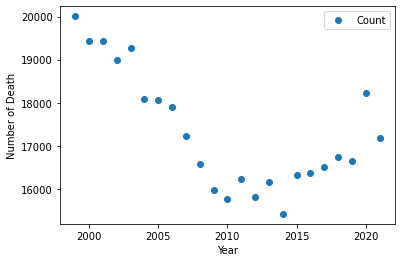

In [9]:
#Looking at the independent variable
data_la.plot (y = 'Count', x = 'Year', style = 'o')
plt.ylabel("Number of Death")
plt.xlabel('Year')
plt.show()

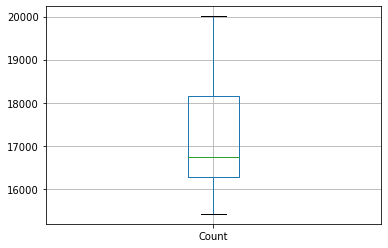

In [22]:
boxplot = data_la.boxplot(column=['Count'])

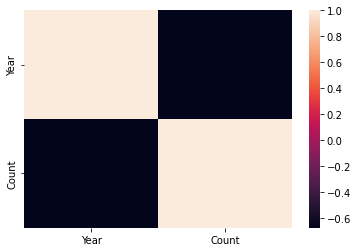

,Year,Count
Year,1.000000,-0.676433
Count,-0.676433,1.000000


In [10]:
# looking a heat map
sns.heatmap(data_la.corr())
plt.show()
data_la.corr()

In [11]:
# Dividing the data into independent and dependent variables
x = pd.DataFrame(data_la['Year'])
y = pd.DataFrame(data_la['Count'])

In [12]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.03, random_state=0)

In [13]:
# training the algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# getting the predicted value by the model
y_pred = model.predict(x_test)

In [15]:
# Evaluating the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error (y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error (y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics. mean_squared_error (y_test, y_pred)))


Mean Absolute Error: 643.6637168141897
Mean Squared Error: 414302.98034305737
Root Mean Squared Error: 643.6637168141897


In [16]:
#calculating the R-squared of regression model
r_squared = model.score(x, y)

#view R-squared value
print(r_squared)

0.45649755803350867
